# In this notebook I create and save the spectra for the data, by using a bigger ROI including all sample, to test for potential differences

##

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import os, fnmatch
from os import listdir
#%matplotlib inline
%matplotlib notebook
import scipy.signal
import matplotlib.patches as patches
from skimage.filters import threshold_otsu
from scipy.stats import binned_statistic
from scipy.signal import resample
import TOF_routines
from TOF_routines import tof2l, l2tof, binning
from skimage import io

In [2]:

# here now I put the number obtained from the flight-path calibration!
t0 =  8.674212674292963e-05
L = 56.74
lambda0 = 0.006
dL = 0

In [3]:
rootpath = '/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/'
coll_dir = sorted(fnmatch.filter(listdir(rootpath),'Sample*Binned'))
print(coll_dir)
pathOB= "/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Flat1_Corrected_Binned/"
myTOF = np.genfromtxt('/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Flat1_Corrected/IMAT00010433_VerticalSetting_2hruns_000_Spectra.txt', usecols=0)

['Sample_10090deg_Corrected_Binned', 'Sample_10099deg_Corrected_Binned', 'Sample_10108deg_Corrected_Binned', 'Sample_10117deg_Corrected_Binned', 'Sample_10126deg_Corrected_Binned', 'Sample_10135deg_Corrected_Binned', 'Sample_10144deg_Corrected_Binned', 'Sample_10153deg_Corrected_Binned', 'Sample_10162deg_Corrected_Binned', 'Sample_10171deg_Corrected_Binned', 'Sample_10180deg_Corrected_Binned']


In [4]:
coll_files=[]
for i in range(0, len(coll_dir)):
# for i in range(0, 1):
    pathdata = rootpath + coll_dir[i]
    print(pathdata)
    coll_files.append(sorted(fnmatch.filter(listdir(pathdata),'*.fits')))

obfiles = fnmatch.filter(listdir(pathOB),'*.fits') # here there are several OB folders
coll_ob = sorted(obfiles)

/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10090deg_Corrected_Binned
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10099deg_Corrected_Binned
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10108deg_Corrected_Binned
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10117deg_Corrected_Binned
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10126deg_Corrected_Binned
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10135deg_Corrected_Binned
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10144deg_Corrected_Binned
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10153deg_Corrected_Binned
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10162deg_Corrected_Binned
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10171deg_Corrected_Binned
/media/carminati_c/Data2/IMAT_

In [5]:
spectrum_ref1=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ref2=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_stress1=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_stress2=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ob_ref1=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ob_ref2=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ob_stress1=np.zeros([len(coll_dir), len(coll_files[0])])
spectrum_ob_stress2=np.zeros([len(coll_dir), len(coll_files[0])])

print(np.shape(spectrum_ref1))

(11, 350)


In [6]:
ob_ratios=np.array([107423.0/121694.0, 107423.0/101050.0, 107423.0/107552.0, 107423.0/96412.0, 107423.0/101731.0, 107423.0/102485.0, 107423.0/97977.0, 107423.0/99884.0, 107423.0/99997.0, 107423.0/107397.0, 107423.0/99095.0] )
print(ob_ratios)

[0.88273046 1.06306779 0.99880058 1.11420777 1.05595148 1.04818266
 1.09641038 1.07547755 1.07426223 1.00024209 1.08404057]


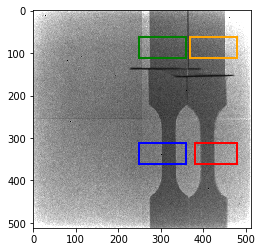

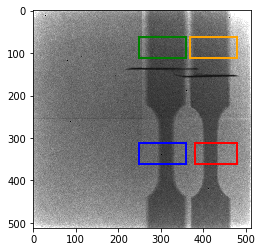

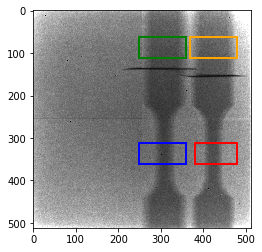

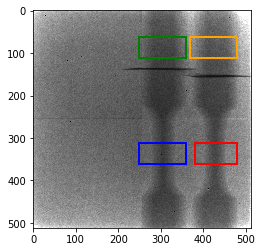

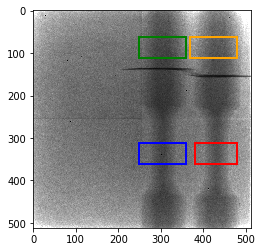

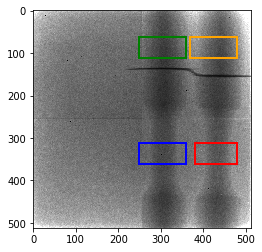

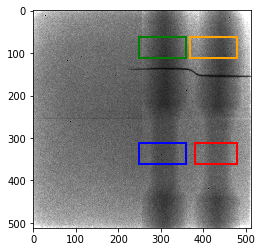

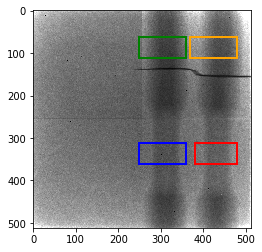

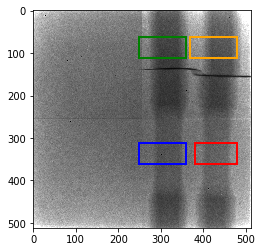

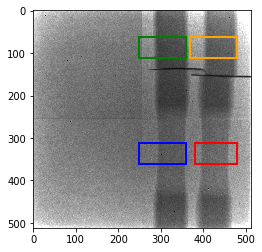

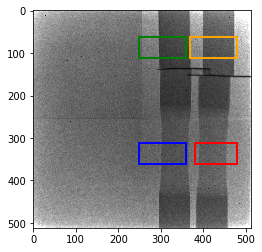

In [7]:
#This is now a bigger ROI to be used for each orientation, possibly combined with a mask

roi_stress1_mask = np.array([380,512-200,460,512-150])
roi_stress2_mask = np.array([250,512-200,360,512-150])
roi_ref1_mask = np.array([370,512-450,480,512-400])
roi_ref2_mask = np.array([250,512-450,360,512-400])

for i in range(0, len(coll_dir)):
    fig,ax =plt.subplots()
    value = rootpath + coll_dir[i]+'/'+coll_files[i][150]
    with fits.open(value) as f:
        myim = (f[0].data) # load the image file, size is rows x columns (es. 512x512)

    ax.imshow(np.rot90(myim), vmin=0, vmax=1000, cmap="gray")

    roi1= patches.Polygon([(380,512-150),(380,512-200),(480,512-200),(480,512-150)], edgecolor='red', facecolor='none',  linewidth=2)
    ax.add_patch(roi1)
    roi2= patches.Polygon([(250, 512-150),(250, 512-200),(360,512-200),(360, 512-150)], edgecolor='blue', facecolor='none',  linewidth=2)
    ax.add_patch(roi2)

    roi3= patches.Polygon([(370,512-450),(370,512-400),(480,512-400),(480,512-450)], edgecolor='orange', facecolor='none',  linewidth=2)
    ax.add_patch(roi3)
    roi4= patches.Polygon([(250,512-450),(250,512-400),(360,512-400),(360,512-450)], edgecolor='green', facecolor='none',  linewidth=2)
    ax.add_patch(roi4)

    
    
    
roi_stress1 = np.array([150,380,200,460])
roi_stress2 = np.array([150,250,200,360])
roi_ref1 = np.array([400,370,450,480])
roi_ref2 = np.array([400,250,450,360])

#     ax.imshow((myim), vmin=0, vmax=200, cmap="gray")
#     roi1= patches.Polygon([(150,380),(200,380),(200,460),(150,460)], edgecolor='red', facecolor='none',  linewidth=2)
#     ax.add_patch(roi1)
#     roi2= patches.Polygon([(150,250),(200,250),(200,360),(150,360)], edgecolor='blue', facecolor='none',  linewidth=2)
#     ax.add_patch(roi2)

#     roi3= patches.Polygon([(450,370),(400,370),(400,480),(450,480)], edgecolor='orange', facecolor='none',  linewidth=2)
#     ax.add_patch(roi3)
#     roi4= patches.Polygon([(450,250),(400,250),(400,360),(450,360)], edgecolor='green', facecolor='none',  linewidth=2)
#     ax.add_patch(roi4)


['Summed_img_0000.fits', 'Summed_img_0001.fits', 'Summed_img_0002.fits', 'Summed_img_0003.fits', 'Summed_img_0004.fits', 'Summed_img_0005.fits', 'Summed_img_0006.fits', 'Summed_img_0007.fits', 'Summed_img_0008.fits', 'Summed_img_0009.fits', 'Summed_img_0010.fits']


/home/carminati_c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/carminati_c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/carminati_c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
/home/carminati_c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/carminati_c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/carminati_c/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see

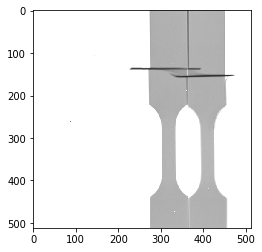

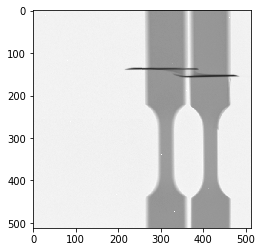

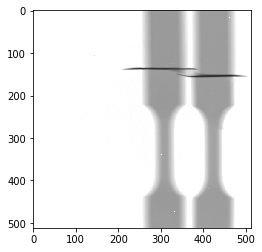

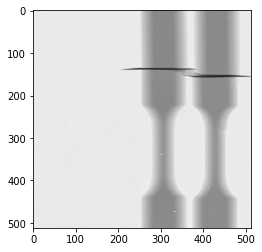

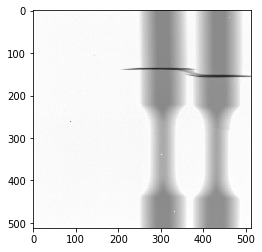

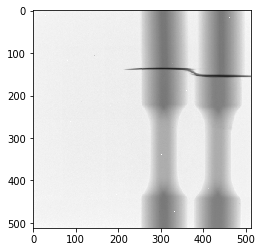

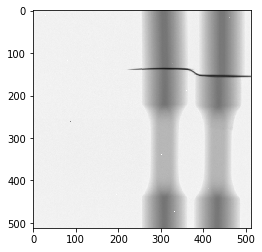

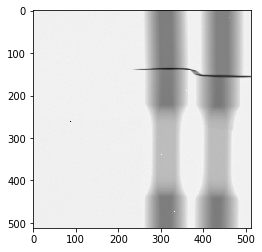

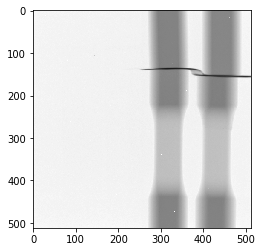

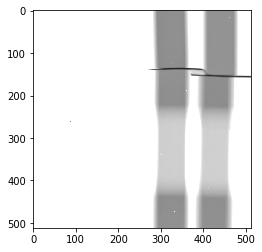

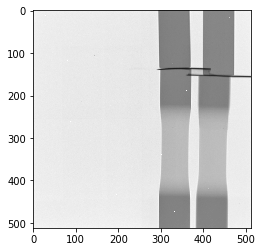

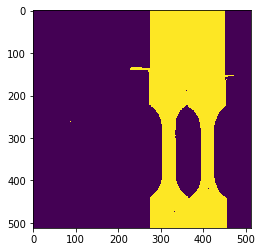

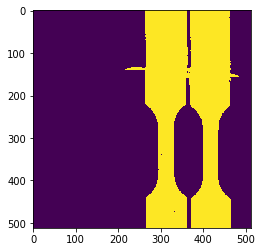

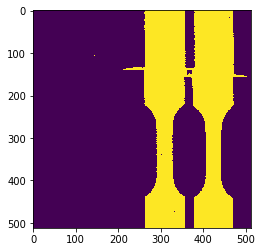

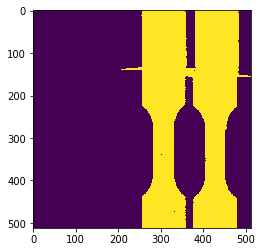

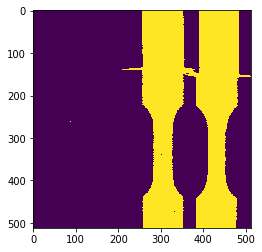

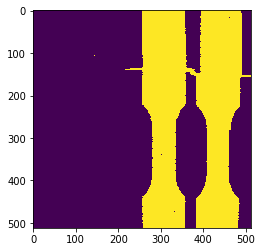

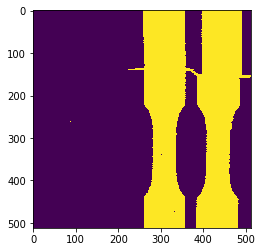

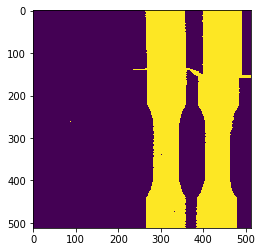

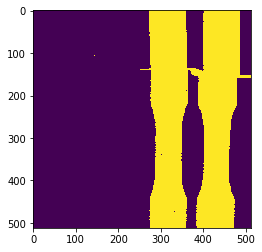

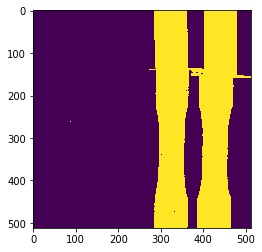

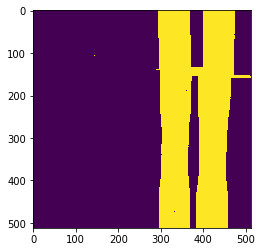

In [8]:
# Here I read the white beam images from which to compute the image mask

path_WB = '/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Summed_imgs/'
myfiles = sorted(fnmatch.filter(listdir(path_WB),'Summed_img*.fits'))
print(myfiles)

myproj=np.zeros([11,512,512])
proj_norm = np.zeros([11,512,512])
mask = np.zeros([11,512,512])

        
with fits.open('/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Summed_imgs/Summed_ob_01.fits') as f:
    ob_wb = f[0].data

for i in range(0, len(myfiles)):
    with fits.open(path_WB+myfiles[i]) as f:
        myproj[i] = f[0].data
        proj_norm[i] = myproj[i]/ob_wb
        mask[i] = proj_norm[i] < 0.85

for i in range(0, len(myfiles)):
    plt.figure()
    plt.imshow(myproj[i]/ob_wb, cmap='gray', vmin=0.0, vmax=1.0)
    
for i in range(0, len(myfiles)):
    plt.figure()
    plt.imshow(mask[i])


Sample_10090deg_Corrected_Binned
816082.291170005 762271.3376829077 274355.887720998 255824.7395624061
Sample_10099deg_Corrected_Binned
850053.3332952517 755488.3825296786 274433.7780624529 271505.8410931704
Sample_10108deg_Corrected_Binned
878251.9899974073 787248.8399666664 300698.1545145188 282398.3113306568
Sample_10117deg_Corrected_Binned
917664.0 817113.0 393206.0 367597.0
Sample_10126deg_Corrected_Binned
866248.0053805432 798744.1752089428 384341.6995338434 350844.6140529137
Sample_10135deg_Corrected_Binned
813965.5780658853 830291.6504915225 472557.6807740561 432504.44035212114
Sample_10144deg_Corrected_Binned
775015.3387744171 779139.0831053064 485531.18784389866 448579.94770537387
Sample_10153deg_Corrected_Binned
741800.0 729724.0 513341.0 475225.0
Sample_10162deg_Corrected_Binned
725244.3201374665 646453.7122876657 555362.7462435325 501738.5214276904
Sample_10171deg_Corrected_Binned
720309.0 563154.0 579897.0 526495.0
Sample_10180deg_Corrected_Binned
607035.1484985286 436722

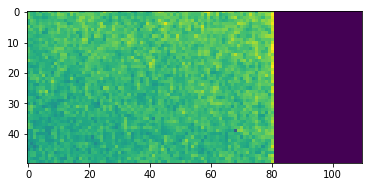

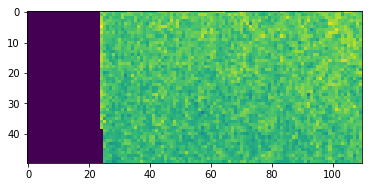

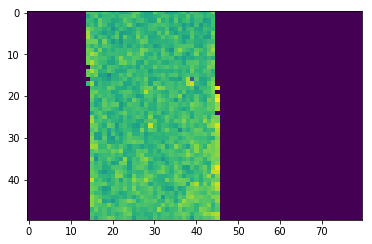

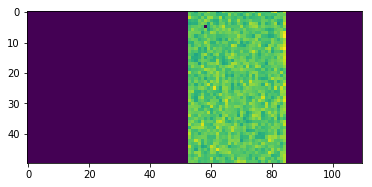

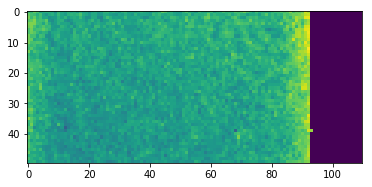

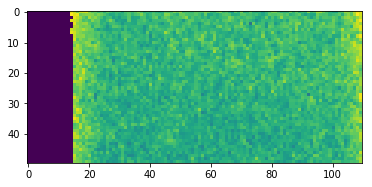

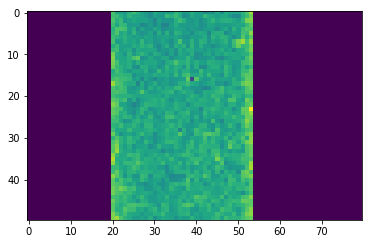

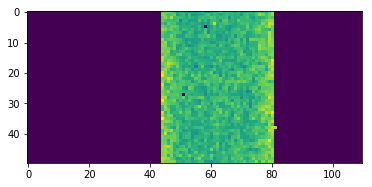

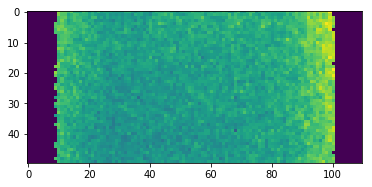

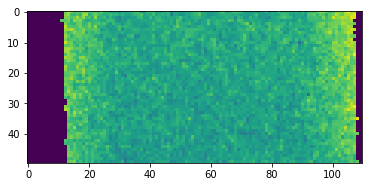

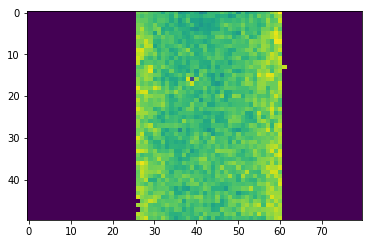

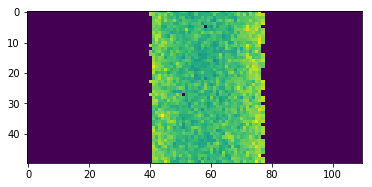

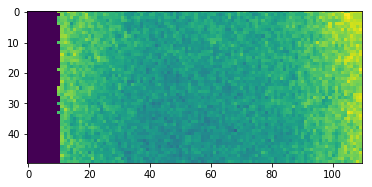

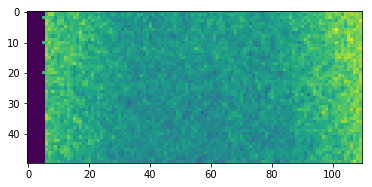

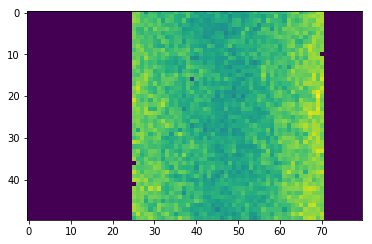

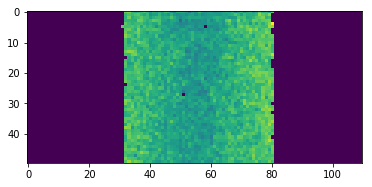

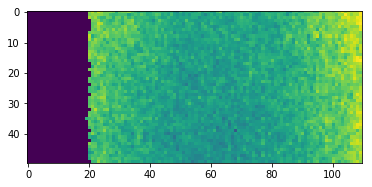

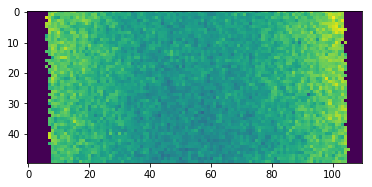

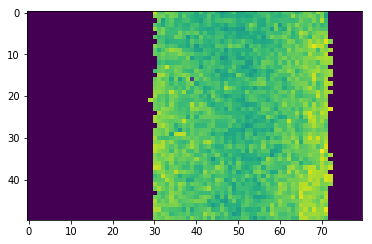

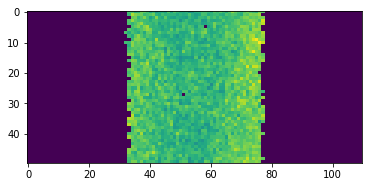

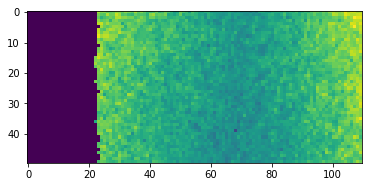

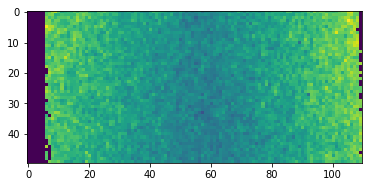

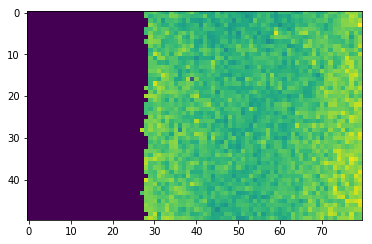

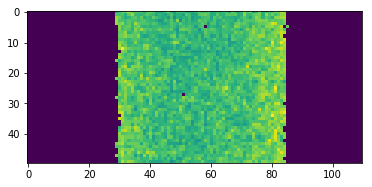

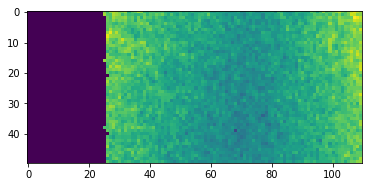

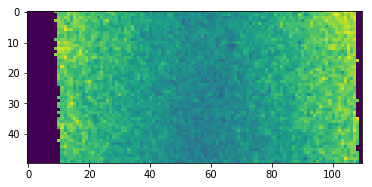

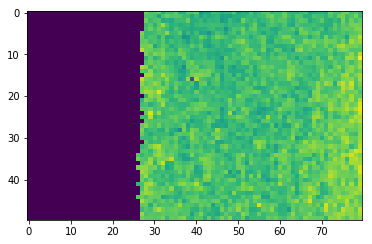

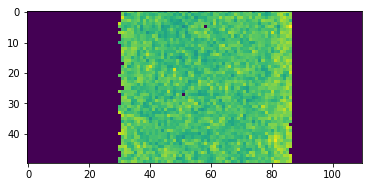

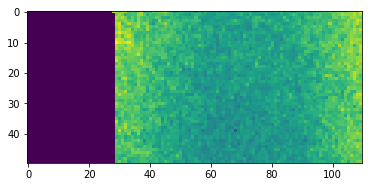

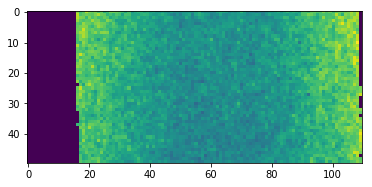

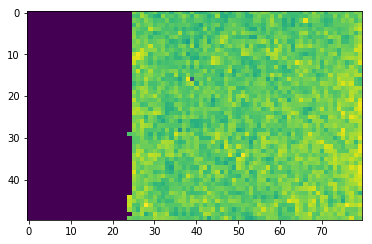

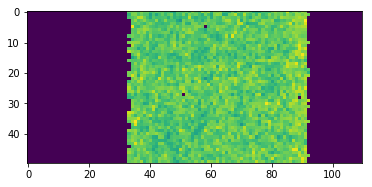

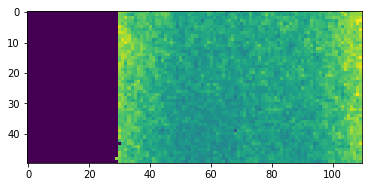

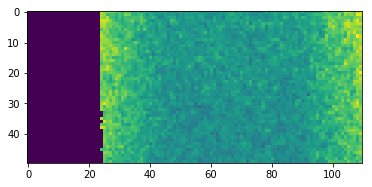

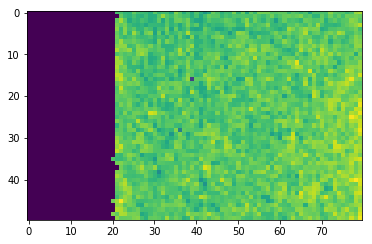

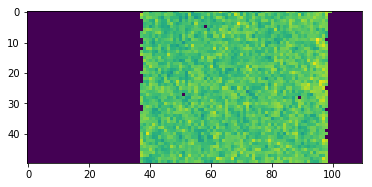

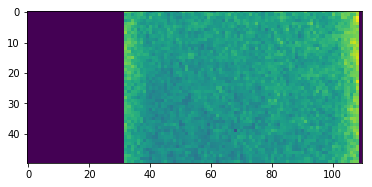

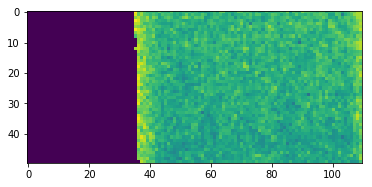

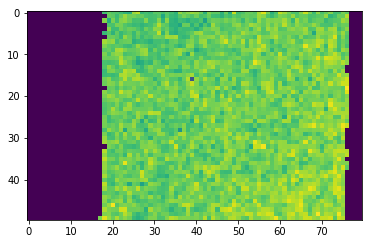

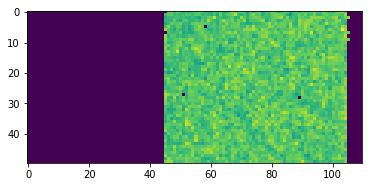

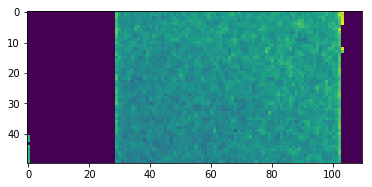

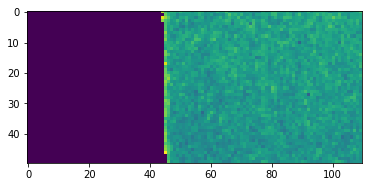

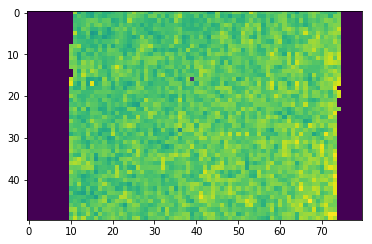

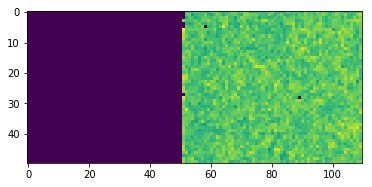

In [9]:
for j in range(0,len(coll_dir)):
    print(coll_dir[j])

    for i in range(0, len(coll_files[0])):
        name = rootpath + coll_dir[j]+'/'+coll_files[j][i]
        with fits.open(name) as f:
            im_ref1 = np.rot90((f[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float))
            im_ref1 *= mask[j][roi_ref1_mask[1]:roi_ref1_mask[3],roi_ref1_mask[0]:roi_ref1_mask[2]]
            im_ref2 = np.rot90((f[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float))
            im_ref2 *= mask[j][roi_ref2_mask[1]:roi_ref2_mask[3],roi_ref2_mask[0]:roi_ref2_mask[2]]
            im_stress1 = np.rot90((f[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float))
            im_stress2 = np.rot90((f[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float))
            im_stress1 *= mask[j][roi_stress1_mask[1]:roi_stress1_mask[3],roi_stress1_mask[0]:roi_stress1_mask[2]]
            im_stress2 *= mask[j][roi_stress2_mask[1]:roi_stress2_mask[3],roi_stress2_mask[0]:roi_stress2_mask[2]]
            spectrum_ref1[j][i]=np.sum(im_ref1[~np.isnan(im_ref1) & ~np.isinf(im_ref1)])
            spectrum_ref2[j][i]=np.sum(im_ref2[~np.isnan(im_ref2) & ~np.isinf(im_ref2)])
            spectrum_stress1[j][i]=np.sum(im_stress1[~np.isnan(im_stress1) & ~np.isinf(im_stress1)])
            spectrum_stress2[j][i]=np.sum(im_stress2[~np.isnan(im_stress2) & ~np.isinf(im_stress2)])

        if (i==1):
            plt.figure()
            plt.imshow(im_ref1)

            plt.figure()
            plt.imshow(im_ref2)

            plt.figure()
            plt.imshow(im_stress1)

            plt.figure()
            plt.imshow(im_stress2)
            print(spectrum_ref1[j][i],spectrum_ref2[j][i],spectrum_stress1[j][i], spectrum_stress2[j][i])
#             print(np.shape(im_ref1))
#             print(roi_ref1[1],roi_ref1[3],roi_ref1[0],roi_ref1[2])
#             print(roi_ref2[1],roi_ref2[3],roi_ref2[0],roi_ref2[2])
#             print(roi_stress1[1],roi_stress1[3],roi_stress1[0],roi_stress1[2])
#             print(roi_stress2[1],roi_stress2[3],roi_stress2[0],roi_stress2[2])
            
        
        nameOB = pathOB + coll_ob[i]
        with fits.open(nameOB) as fOB:
            ob_ref1= np.rot90((fOB[0].data[roi_ref1[1]:roi_ref1[3],roi_ref1[0]:roi_ref1[2]]).astype(float))*ob_ratios[j]
            ob_ref2= np.rot90((fOB[0].data[roi_ref2[1]:roi_ref2[3],roi_ref2[0]:roi_ref2[2]]).astype(float))*ob_ratios[j]
            ob_stress1= np.rot90((fOB[0].data[roi_stress1[1]:roi_stress1[3],roi_stress1[0]:roi_stress1[2]]).astype(float))*ob_ratios[j]
            ob_stress2= np.rot90((fOB[0].data[roi_stress2[1]:roi_stress2[3],roi_stress2[0]:roi_stress2[2]]).astype(float))*ob_ratios[j]
            spectrum_ob_ref1[j][i]=np.sum(ob_ref1[~np.isnan(ob_ref1) & ~np.isinf(ob_ref1)])
            spectrum_ob_ref2[j][i]=np.sum(ob_ref2[~np.isnan(ob_ref2) & ~np.isinf(ob_ref2)])
            spectrum_ob_stress1[j][i]=np.sum(ob_stress1[~np.isnan(ob_stress1) & ~np.isinf(ob_stress1)])
            spectrum_ob_stress2[j][i]=np.sum(ob_stress2[~np.isnan(ob_stress2) & ~np.isinf(ob_stress2)])

In [10]:
# print(spectrum_ref1[1][:])

In [11]:
print(np.shape(spectrum_ob_ref1))
print(np.shape(spectrum_ref1))
print(np.shape(spectrum_stress1))

(11, 350)
(11, 350)
(11, 350)


In [12]:
mylambda = tof2l(myTOF, lambda0,t0, L)
lambda_bin = binning(mylambda, 350)

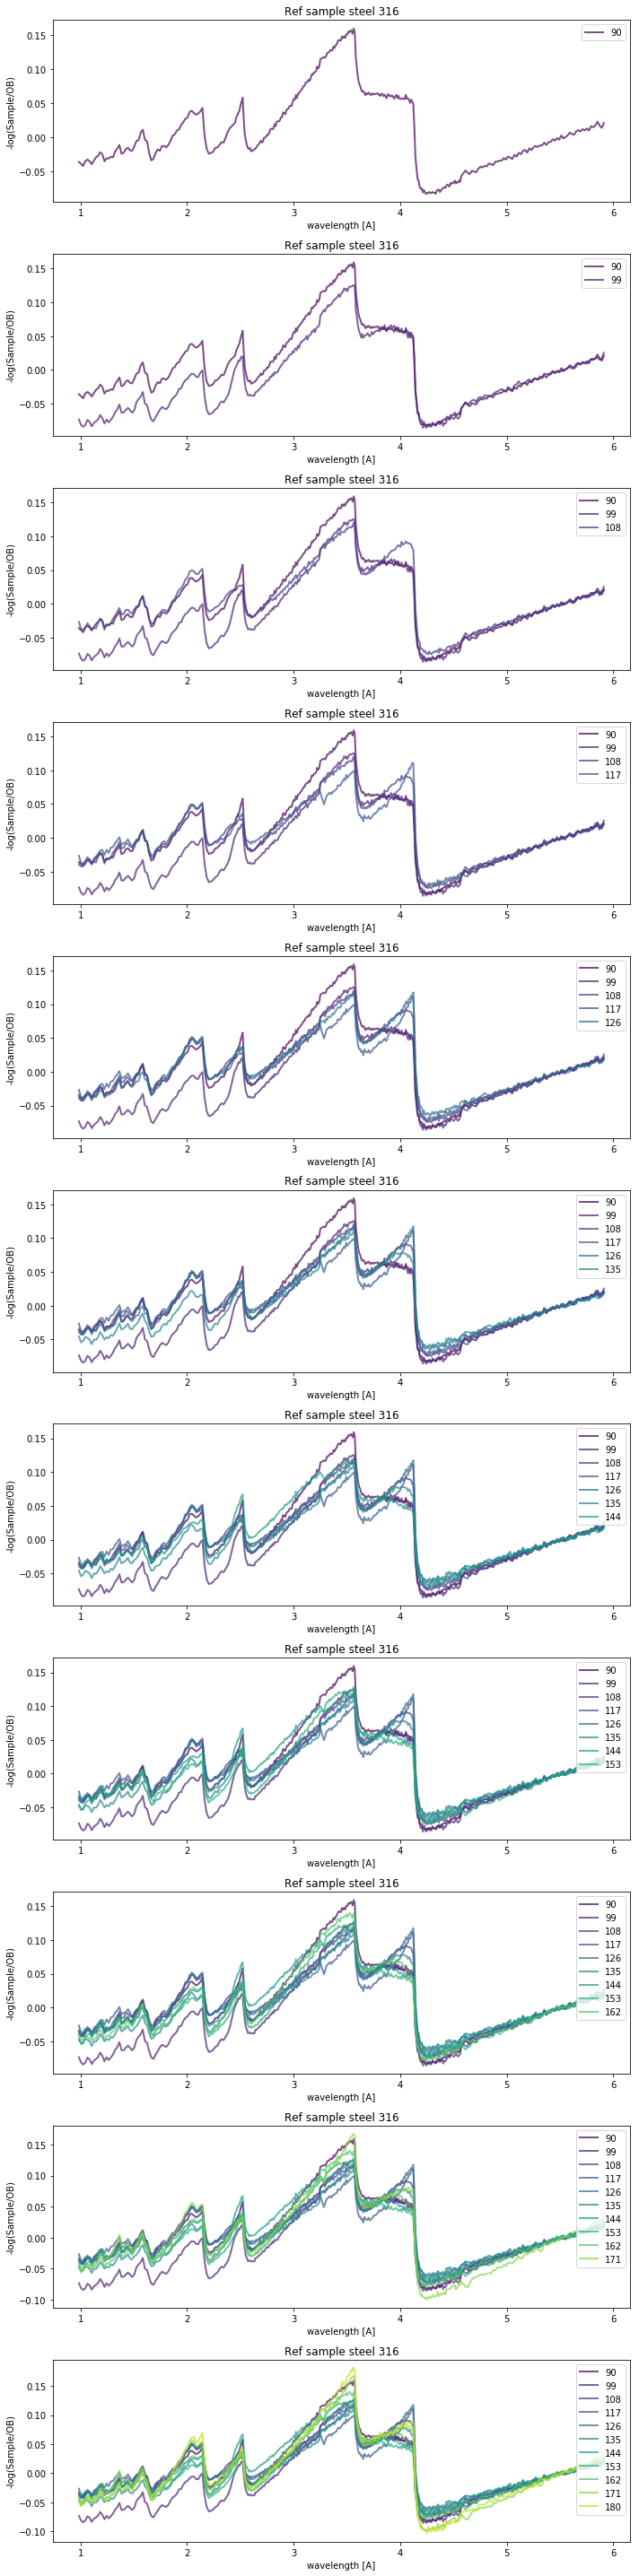

In [13]:
fig, ax = plt.subplots(11,1,figsize=[10,40])
# cmap = matplotlib.cm.rainbow

cmap = matplotlib.cm.viridis
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')
for j in range(0, len(coll_dir)):
    for i in range(0, j+1):
        
        ref2_spectrum_norm=(spectrum_ref2[i][:]/spectrum_ob_ref2[i][:])
        last_part = np.mean(ref2_spectrum_norm[320:340])
        
#         ref2_spectrum_bin = binning(ref2_spectrum_norm/last_part,350)
        
#         plt.plot(mylambda, ref2_spectrum_norm, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
#         ax[j].plot(mylambda, ref2_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
        ax[j].plot(lambda_bin, -1*np.log(ref2_spectrum_norm/last_part), color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i],linewidth=2)
#         ax[j].set_xlim(0.5,7.0)
        ax[j].set_title('Ref sample steel 316')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('-log(Sample/OB)')

#     ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))
    ax[j].legend(loc='upper right')

fig.tight_layout()
fig.savefig('Log_Ref_steel_316_bigROI.eps', format='eps', dpi=400)

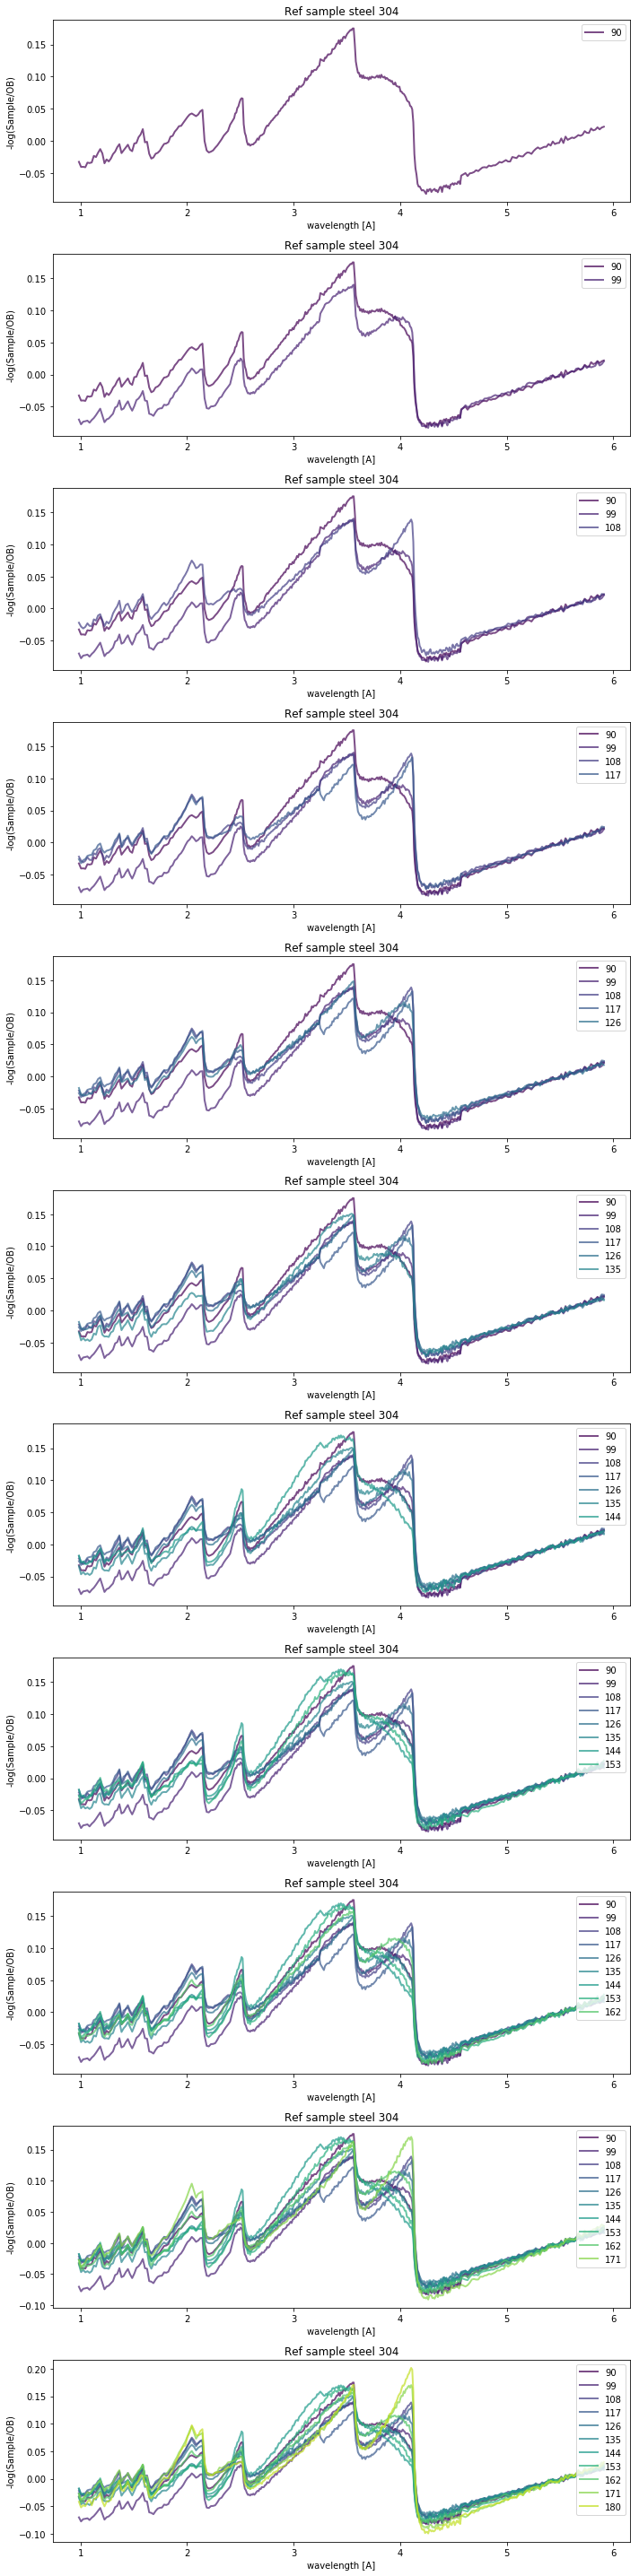

In [14]:
fig, ax = plt.subplots(11,1,figsize=[10,40])
# cmap = matplotlib.cm.rainbow

cmap = matplotlib.cm.viridis
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')
for j in range(0, len(coll_dir)):
    for i in range(0, j+1):
        
        ref1_spectrum_norm=(spectrum_ref1[i][:]/spectrum_ob_ref1[i][:])
        last_part = np.mean(ref1_spectrum_norm[320:340])
        
#         ref2_spectrum_bin = binning(ref2_spectrum_norm/last_part,350)
        
#         plt.plot(mylambda, ref2_spectrum_norm, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
#         ax[j].plot(mylambda, ref2_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
        ax[j].plot(lambda_bin, -1*np.log(ref1_spectrum_norm/last_part), color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i],linewidth=2)
#         ax[j].set_xlim(0.5,7.0)
        ax[j].set_title('Ref sample steel 304')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('-log(Sample/OB)')

#     ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))
    ax[j].legend(loc='upper right')

fig.tight_layout()
fig.savefig('Log_Ref_steel_304_bigROI.eps', format='eps', dpi=400)

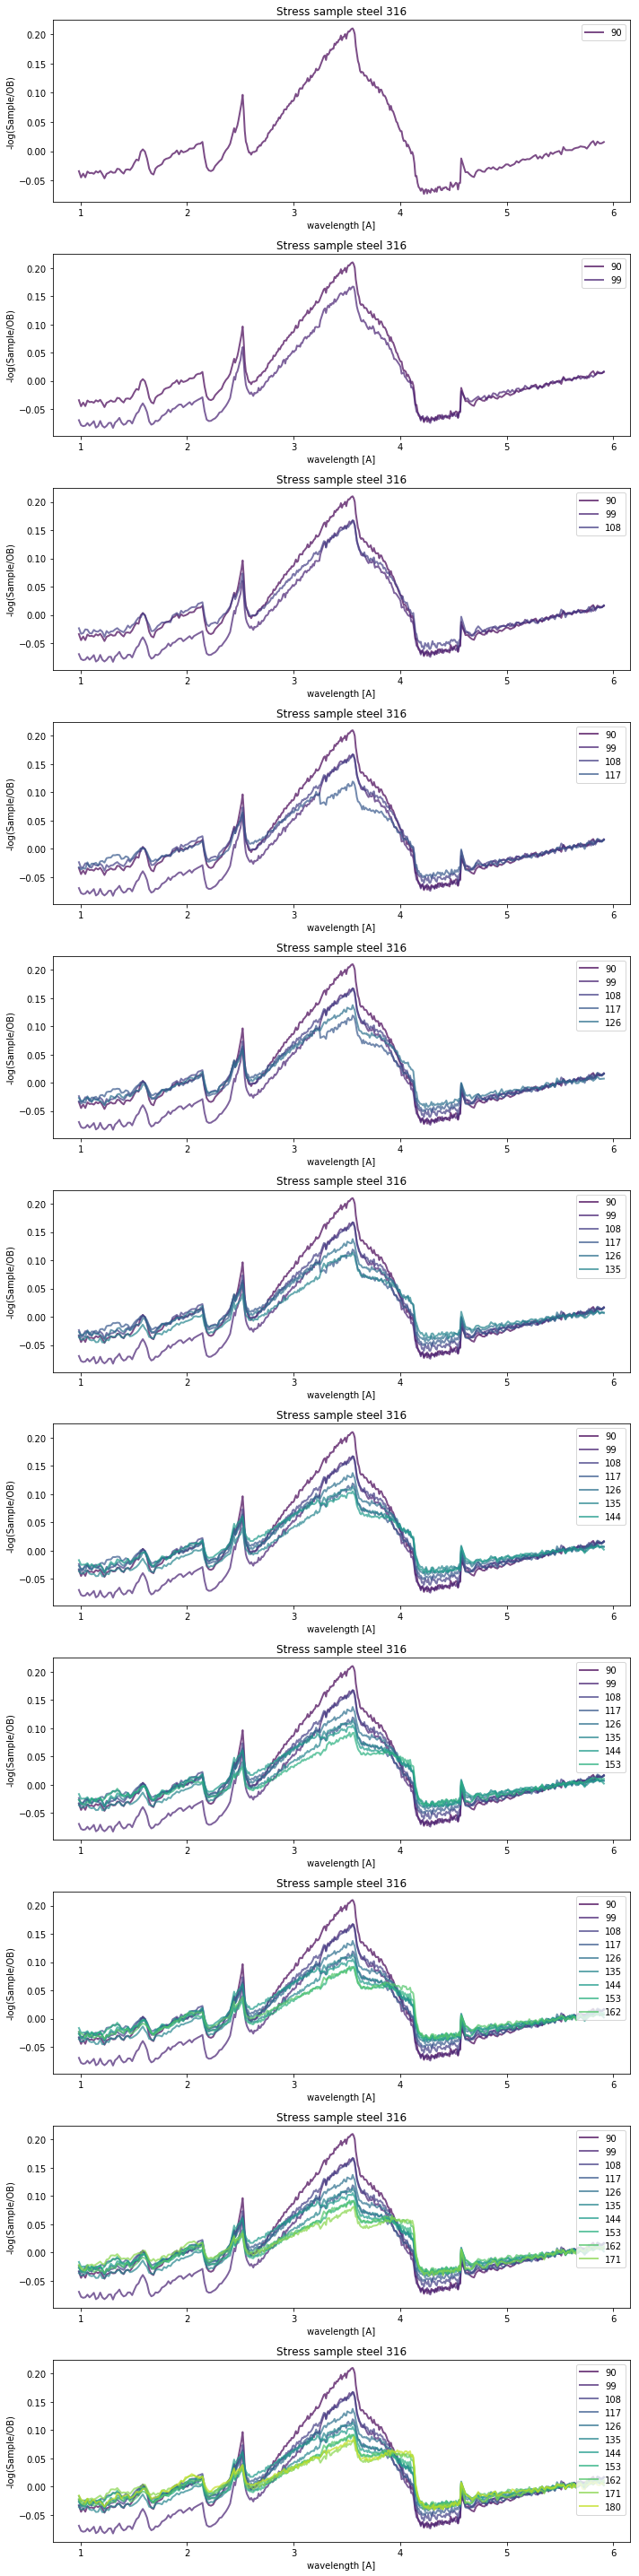

In [15]:
fig, ax = plt.subplots(11,1,figsize=[10,40])
# cmap = matplotlib.cm.rainbow

cmap = matplotlib.cm.viridis
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')
for j in range(0, len(coll_dir)):
    for i in range(0, j+1):
        
        stress2_spectrum_norm=(spectrum_stress2[i][:]/spectrum_ob_stress2[i][:])
        last_part = np.mean(stress2_spectrum_norm[320:340])
        
#         ref2_spectrum_bin = binning(ref2_spectrum_norm/last_part,350)
        
#         plt.plot(mylambda, ref2_spectrum_norm, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
#         ax[j].plot(mylambda, ref2_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
        ax[j].plot(lambda_bin, -1*np.log(stress2_spectrum_norm/last_part), color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i],linewidth=2)
#         ax[j].set_xlim(0.5,7.0)
        ax[j].set_title('Stress sample steel 316')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('-log(Sample/OB)')

        
#     ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))
    ax[j].legend(loc='upper right')

fig.tight_layout()
fig.savefig('Log_Stress_steel_316_bigROI.eps', format='eps', dpi=400)

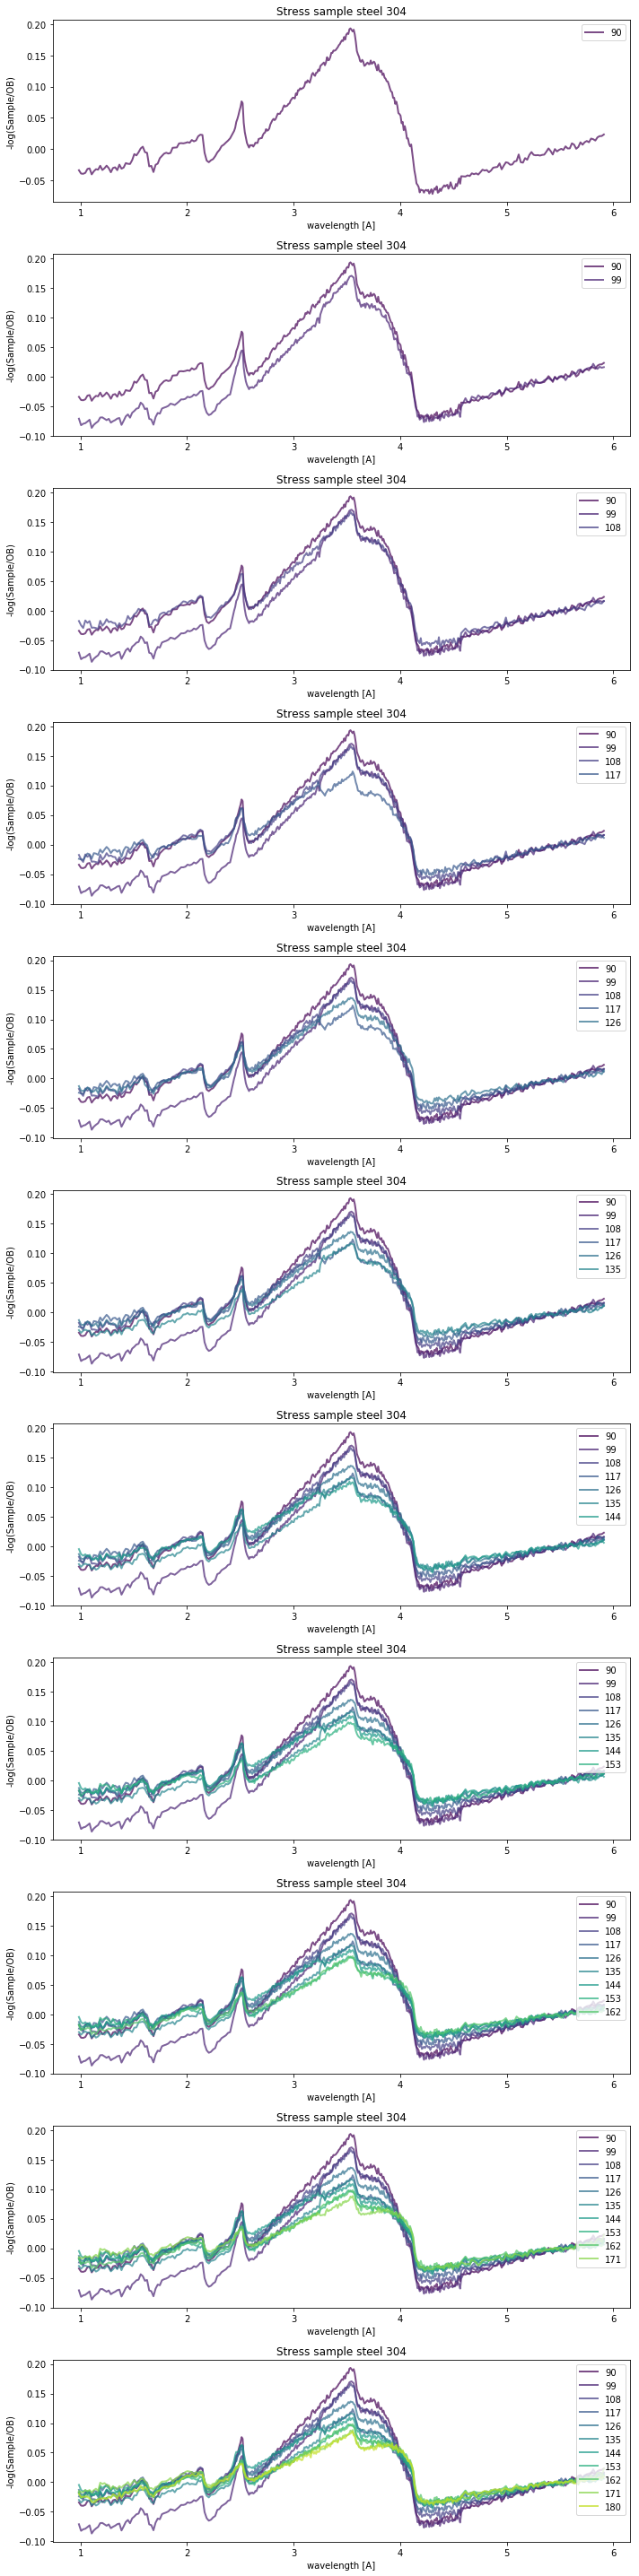

In [16]:
fig, ax = plt.subplots(11,1,figsize=[10,40])
# cmap = matplotlib.cm.rainbow

cmap = matplotlib.cm.viridis
labels = np.chararray(11)
labels=('90','99','108','117','126','135','144','153','162','171','180')
for j in range(0, len(coll_dir)):
    for i in range(0, j+1):
        
        stress1_spectrum_norm=(spectrum_stress1[i][:]/spectrum_ob_stress1[i][:])
        last_part = np.mean(stress1_spectrum_norm[320:340])
        
#         ref2_spectrum_bin = binning(ref2_spectrum_norm/last_part,350)
        
#         plt.plot(mylambda, ref2_spectrum_norm, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
#         ax[j].plot(mylambda, ref2_spectrum_norm/last_part, color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i])
        ax[j].plot(lambda_bin, -1*np.log(stress1_spectrum_norm/last_part), color=cmap(i/float(len(coll_dir))), alpha=0.7, label=labels[i],linewidth=2)
#         ax[j].set_xlim(0.5,7.0)
        ax[j].set_title('Stress sample steel 304')
        ax[j].set_xlabel('wavelength [A]')
        ax[j].set_ylabel('-log(Sample/OB)')

        
#     ax[j].legend(loc='upper left', bbox_to_anchor=(1,1))
    ax[j].legend(loc='upper right')

fig.tight_layout()
fig.savefig('Log_Stress_steel_304_bigROI.eps', format='eps', dpi=400)

In [17]:
np.savetxt('spectrum_ref_304_bigROI.txt', spectrum_ref1)
np.savetxt('spectrum_ref_316_bigROI.txt', spectrum_ref2)
np.savetxt('spectrum_stress_304_bigROI.txt', spectrum_stress1)
np.savetxt('spectrum_stress_316_bigROI.txt', spectrum_stress2)
np.savetxt('spectrum_ob_ref_304_bigROI.txt', spectrum_ob_ref1)
np.savetxt('spectrum_ob_ref_316_bigROI.txt', spectrum_ob_ref2)
np.savetxt('spectrum_ob_stress_304_bigROI.txt', spectrum_ob_stress1)
np.savetxt('spectrum_ob_stress_316_bigROI.txt', spectrum_ob_stress2)

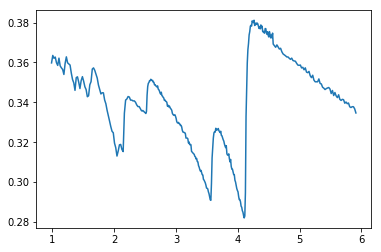

In [19]:
plt.plot(lambda_bin, spectrum_ref1[10,:]/spectrum_ob_ref1[10,:])

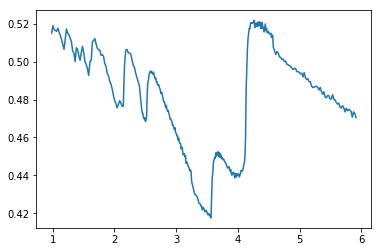

In [21]:
plt.plot(lambda_bin, spectrum_ref1[1,:]/spectrum_ob_ref1[1,:])

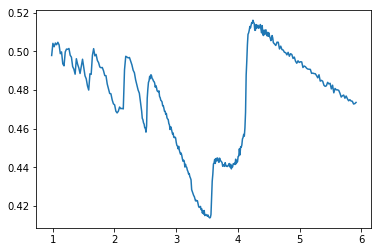

In [24]:
plt.plot(lambda_bin, spectrum_ref1[5,:]/spectrum_ob_ref1[5,:])

In [25]:
np.savetxt('lambda_bin.txt', lambda_bin)
np.savetxt('sample_ref_99deg.txt', spectrum_ref1[1,:]/spectrum_ob_ref1[1,:])
np.savetxt('sample_ref_180deg.txt', spectrum_ref1[10,:]/spectrum_ob_ref1[10,:])
np.savetxt('sample_ref_126deg.txt', spectrum_ref1[4,:]/spectrum_ob_ref1[4,:])
np.savetxt('sample_ref_137deg.txt', spectrum_ref1[5,:]/spectrum_ob_ref1[5,:])